In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as keras
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras import layers
from tensorflow.keras.models import Model

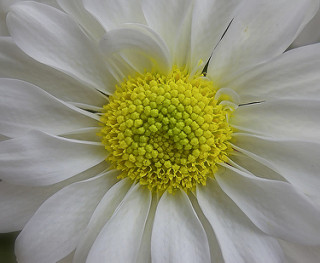

In [2]:
img = tf.keras.preprocessing.image.load_img(r"D:\Downloads\archive\flowers\flowers\flower_photos/train/daisy/100080576_f52e8ee070_n.jpg")
img

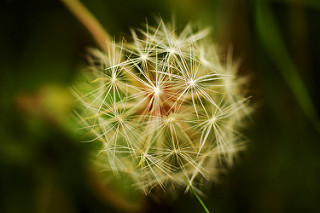

In [3]:
img = tf.keras.preprocessing.image.load_img(r"D:\Downloads\archive\flowers\flowers\flower_photos/train/dandelion/10043234166_e6dd915111_n.jpg")
img

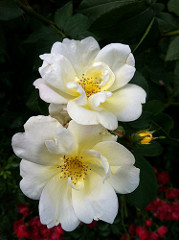

In [4]:
img = tf.keras.preprocessing.image.load_img(r"D:\Downloads\archive\flowers\flowers\flower_photos/train/roses/10090824183_d02c613f10_m.jpg")
img

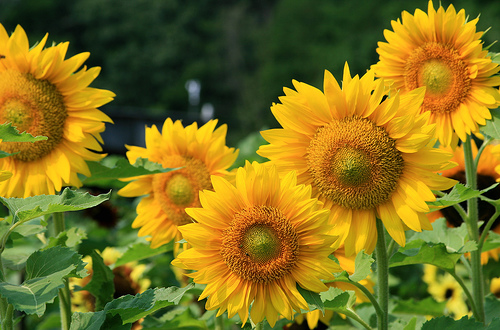

In [5]:
img = tf.keras.preprocessing.image.load_img(r"D:\Downloads\archive\flowers\flowers\flower_photos/train/sunflowers/1008566138_6927679c8a.jpg")
img

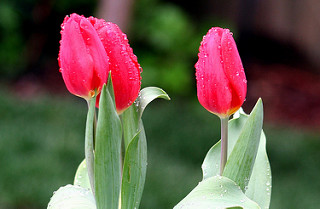

In [6]:
img = tf.keras.preprocessing.image.load_img(r"D:\Downloads\archive\flowers\flowers\flower_photos/train/tulips/100930342_92e8746431_n.jpg")
img

In [7]:
aug = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
aug1=ImageDataGenerator()

In [8]:
class_names = ['daisy','dandelion','roses','sunflowers','tulips']

In [9]:
train_generator = aug.flow_from_directory( 
    directory=r"D:\Downloads\archive\flowers\flowers\flower_photos/train", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="categorical", 
)

Found 3540 images belonging to 5 classes.


In [10]:
valid_generator = aug1.flow_from_directory( 
    directory=r"D:\Downloads\archive\flowers\flowers\flower_photos/validation/", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="categorical", 
)

Found 80 images belonging to 5 classes.


In [11]:
test_generator = aug1.flow_from_directory( 
    directory=r"D:\Downloads\archive\flowers\flowers\flower_photos/test/", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="categorical", 
)

Found 50 images belonging to 5 classes.


In [1]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [4]:
from tensorflow.keras import layers, Model

input_tensor = layers.Input(shape=(224, 224, 3))

x = layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(input_tensor)
x = layers.BatchNormalization()(x)
x = layers.Activation('swish')(x)

x = layers.DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('swish')(x)
x = layers.Conv2D(16, kernel_size=(1, 1), strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)

x = layers.DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('swish')(x)
x = layers.Conv2D(24, kernel_size=(1, 1), strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)

x = layers.DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('swish')(x)
x = layers.Conv2D(40, kernel_size=(1, 1), strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)

x = layers.DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('swish')(x)
x = layers.Conv2D(80, kernel_size=(1, 1), strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)

x = layers.DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('swish')(x)
x = layers.Conv2D(112, kernel_size=(1, 1), strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)

x = layers.DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('swish')(x)
x = layers.Conv2D(192, kernel_size=(1, 1), strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)

x = layers.DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('swish')(x)
x = layers.Conv2D(320, kernel_size=(1, 1), strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(1280, activation='swish')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(640, activation='swish')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(320, activation='swish')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(160, activation='swish')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(80, activation='swish')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(40, activation='swish')(x)
x = layers.Dropout(0.5)(x)

predictions = layers.Dense(5, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=predictions)

In [111]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [155]:
def trainModel(model, epochs, optimizer,early_stopping,reduce_lr):
    batch_size = 16
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size,callbacks=[early_stopping, reduce_lr])
    

In [160]:
model_history = trainModel(model=model, epochs=15, optimizer=Adam(),early_stopping=early_stopping,reduce_lr=reduce_lr)

Epoch 1/15
111/111 [==============================] - 62s 521ms/step - loss: 0.6453 - accuracy: 0.7842 - val_loss: 0.9842 - val_accuracy: 0.6750 - lr: 0.0010
Epoch 2/15
111/111 [==============================] - 60s 541ms/step - loss: 0.5864 - accuracy: 0.8102 - val_loss: 0.9000 - val_accuracy: 0.7375 - lr: 0.0010
Epoch 3/15
111/111 [==============================] - 61s 550ms/step - loss: 0.6284 - accuracy: 0.7879 - val_loss: 2.4671 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 4/15
111/111 [==============================] - 71s 644ms/step - loss: 0.6396 - accuracy: 0.7904 - val_loss: 0.5728 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 5/15
111/111 [==============================] - 68s 608ms/step - loss: 0.5764 - accuracy: 0.8076 - val_loss: 0.9043 - val_accuracy: 0.7125 - lr: 0.0010
Epoch 6/15
111/111 [==============================] - 67s 598ms/step - loss: 0.5813 - accuracy: 0.8096 - val_loss: 0.8490 - val_accuracy: 0.7625 - lr: 0.0010
Epoch 7/15
111/111 [==============================] 

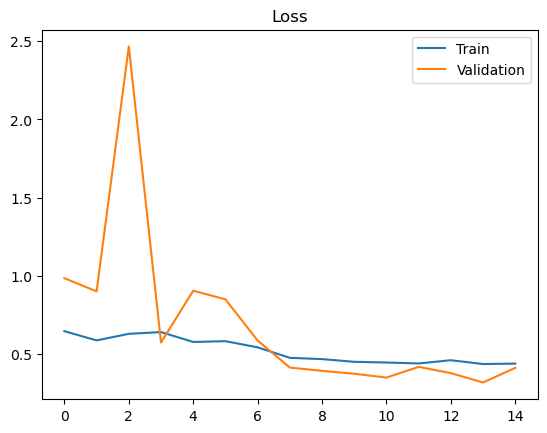

In [161]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

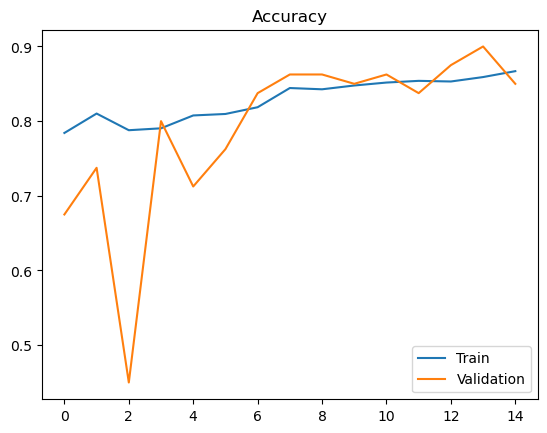

In [162]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [163]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

2/2 [==============================] - 0s 106ms/step - loss: 0.8870 - accuracy: 0.8000
The test loss is:  0.8870118856430054
The best accuracy is:  80.0000011920929


In [164]:
import pickle
file = open("final6.pkl", 'wb')
pickle.dump(model, file)
file.close()

In [165]:
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

with open('final6.pkl', 'rb') as file:
    model1 = pickle.load(file)

In [167]:
img = tf.keras.preprocessing.image.load_img('OIP (1).jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array])
print(img_array.shape)
predictions = model1.predict(img_array)
print(predictions)
class_id = np.argmax(predictions, axis = 1)
print(class_id)
class_names = ['daisy','dandelion','roses','sunflowers','tulips']
class_names[class_id.item()]

(1, 224, 224, 3)
1/1 [==============================] - 0s 30ms/step
[[4.2328616e-06 9.9998546e-01 8.2034339e-06 2.5101238e-07 1.8514874e-06]]
[1]


'dandelion'